In [1]:
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
CL, V = 12.0, 40.0          # L/h, L
k_in = 50.0                 # nmol/L/h
k_out = np.log(2) / 8.0     # h^-1
Imax, IC50 = 0.9, 20.0      # unitless, nmol/L
dose = 50.0                 # mg
F = 0.8                     # bioavailability

In [3]:
def rhs(t, y):
    Cp, R = y
    dCp = -(CL / V) * Cp
    inhib = Imax * Cp / (IC50 + Cp)
    dR = k_in * (1.0 - inhib) - k_out * R
    return [dCp, dR]

In [5]:
C0 = (F * dose) / V
sol = solve_ivp(rhs, [0.0, 48.0], [C0, k_in / k_out], dense_output=True)
time = np.linspace(0.0, 48.0, 200)
Cp, cortisol = sol.sol(time)

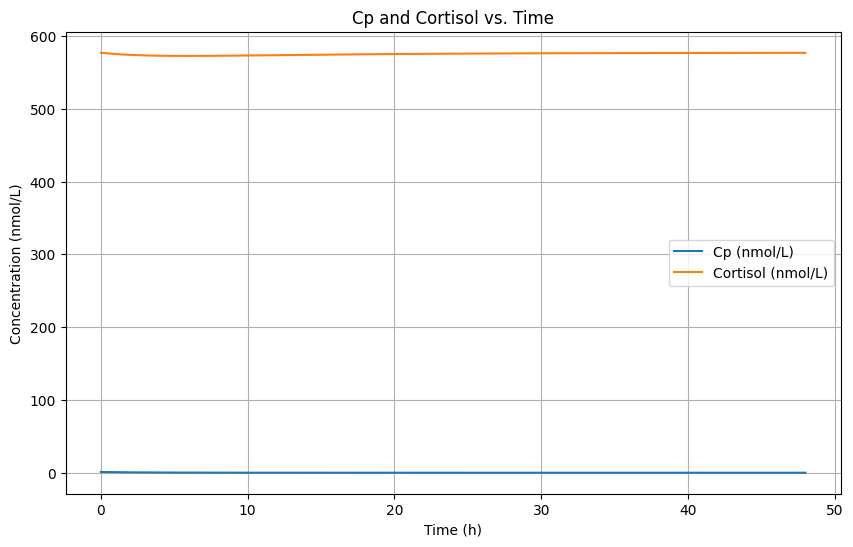

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time, Cp, label='Cp (nmol/L)')
plt.plot(time, cortisol, label='Cortisol (nmol/L)')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (nmol/L)')
plt.title('Cp and Cortisol vs. Time')
plt.legend()
plt.grid(True)
plt.show()

nmol/L is nanomoles per liter, which is a unit of molar concentration. It represents the number of nanomoles of a substance per liter of solution.